### Boilerplate imports

In [6]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

Calculate the number of seconds in the month of June

In [7]:
days_june = 30
sec_june = days_june*24*3600
print('There are',sec_june,'seconds in June.')

There are 2592000 seconds in June.


Import world data and do things

In [9]:
filename="world_population.csv"
world_population=Table.read_table(filename)
world_population

Population
2557628654
2594939877
2636772306
2682053389
2730228104
2782098943
2835299673
2891349717
2948137248
3000716593


Population in 2015

In [13]:
world_population.column("Population").take(-1)

7256490011

Population growth between 1950 and 2015

In [15]:
world_pop_growth_total=world_population.column("Population").take(-1)-world_population.column("Population").take(0)
world_pop_growth_total

4698861357

Average annual growth over this period

In [17]:
world_pop_growth_avg=world_pop_growth_total/(2015-1950)
world_pop_growth_avg

72290174.72307692

Annual growth rate

In [21]:
annual_growth_rate=(world_population.column("Population").take(-1)/world_population.column("Population").take(0))**(1/65)-1
annual_growth_rate

0.01617270380658975

*Stuff with Titanic dataset*

Read dataset in as table

In [32]:
titanic_data=Table.read_table("https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv")
titanic_data

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


Relabel a column label

In [33]:
titanic_data=Table.relabel(titanic_data, "Pclass","passenger_class")
titanic_data

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


Create a new column by adding values from two others, and add it to the table

In [42]:
fam=titanic_data.column("SibSp")+titanic_data.column("Parch")
titanic_data_fam=titanic_data.with_column("family_size", fam)
titanic_data_fam

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,0
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C,1


Create a bar plot of number of passengers, broken down by passenger class

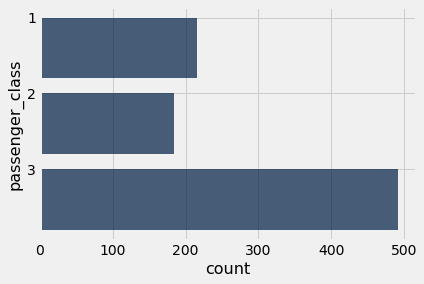

In [76]:
titanic_data_fam.group("passenger_class").barh("passenger_class")

Sort the data by age and show the youngest 5 passengers

In [48]:
titanic_data_fam.sort("Age")

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,nan,C,1
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S,2
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C,3
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C,3
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S,2
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.75,nan,S,2
306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S,3
165,0,3,"Panula, Master. Eino Viljami",male,1,4,1,3101295,39.6875,nan,S,5
173,1,3,"Johnson, Miss. Eleanor Ileen",female,1,1,1,347742,11.1333,nan,S,2
184,1,2,"Becker, Master. Richard F",male,1,2,1,230136,39,F4,S,3


Sort from oldest to youngest and show 5 oldest passengers

In [61]:
titanic_data_fam.where("Age",are.not_equal_to("nan"))

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,0
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C,1


In [73]:
titanic_data_fam.where("Age",are.between(0,200)).sort("Age",descending=True)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S,0
852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,nan,S,0
494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,nan,C,0
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C,0
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,nan,Q,0
746,0,1,"Crosby, Capt. Edward Gifford",male,70,1,1,WE/P 5735,71,B22,S,2
673,0,2,"Mitchell, Mr. Henry Michael",male,70,0,0,C.A. 24580,10.5,nan,S,0
34,0,2,"Wheadon, Mr. Edward H",male,66,0,0,C.A. 24579,10.5,nan,S,0
457,0,1,"Millet, Mr. Francis Davis",male,65,0,0,13509,26.55,E38,S,0
281,0,3,"Duane, Mr. Frank",male,65,0,0,336439,7.75,nan,Q,0


Find the survival rate for passnegers broken down by passenger class.

In [88]:
survived_by_class=titanic_data_fam.where("Survived",1).select("passenger_class").group("passenger_class").column("count")
survived_by_class

array([136,  87, 119])

In [90]:
total_by_class=titanic_data_fam.group("passenger_class").column("count")
total_by_class

array([216, 184, 491])

In [93]:
mean_survival=survived_by_class/total_by_class
mean_survival

array([0.62962963, 0.47282609, 0.24236253])

In [84]:
help(Table.where)

Help on function where in module datascience.tables:

where(self, column_or_label, value_or_predicate=None, other=None)
    Return a new ``Table`` containing rows where ``value_or_predicate``
    returns True for values in ``column_or_label``.
    
    Args:
        ``column_or_label``: A column of the ``Table`` either as a label
        (``str``) or an index (``int``). Can also be an array of booleans;
        only the rows where the array value is ``True`` are kept.
    
        ``value_or_predicate``: If a function, it is applied to every value
        in ``column_or_label``. Only the rows where ``value_or_predicate``
        returns True are kept. If a single value, only the rows where the
        values in ``column_or_label`` are equal to ``value_or_predicate``
        are kept.
    
        ``other``: Optional additional column label for
        ``value_or_predicate`` to make pairwise comparisons. See the
        examples below for usage. When ``other`` is supplied,
        ``val

In [71]:
help(np.isnan)

Help on ufunc object:

isnan = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  Calling ufuncs:
 |  ===============
 |  
 |  op(*x[, out], where=True, **kwargs)
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate array